In [1]:
from bs4 import BeautifulSoup
import urllib2
import sys, os
import re
from datetime import date, timedelta
from datetime import datetime
import urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import pandas as pd

# Get Pages

In [2]:
pre_url = 'http://www.calottery.com/play/draw-games/mega-millions/winning-numbers/?page='
save_path = '/hdd2/calottery/'

In [3]:
def Get_One_Page_Table(table_content):
        ###### Get time ######
    span_date = table_content.findAll('span', {'id':re.compile(r'objBody_content_0_pagecontent_0*')})
    date_list = []
    for s in span_date:
        str_date = s.contents[0]
        str_date = str(str_date.split('-')[0])
        data_object = datetime.strptime(str_date, '%b %d, %Y ')
        date_list.append(data_object)


    ###### Get winning numbers ######
    winning_num = []
    i = 1
    for ele in table_content.findAll('td'):
        if ( i % 3 == 2 ):
            numbers = ele.findAll('span')
            num_list = []
            for num in numbers:
                if (len(num.contents) > 0):
                    num_list.append(int(num.contents[0]))
            winning_num.append(num_list)
        i += 1

    mega_list = []
    ###### Get mega  ######
    for ele in table_content.findAll('td', class_='center'):
        str_num = int(ele.contents[0])
        mega_list.append(str_num)

    df = pd.DataFrame([[date_list[0], winning_num[0], mega_list[0]]], columns=['Date', 'Winning Num', 'Mega'])
    n = len(date_list)
    for i in range(1,n):
        row = []
        row.append(date_list[i])
        row.append(winning_num[i])
        row.append(mega_list[i])
        df = df.append(pd.DataFrame([row], columns=['Date', 'Winning Num', 'Mega']),ignore_index=True)
    return df

In [41]:
num_page = 10
df = pd.DataFrame(columns=['Date', 'Winning Num', 'Mega'])
for i in range(1,num_page):
    target_url = pre_url + str(i)
    r = urllib.urlopen(target_url).read()
    soup = BeautifulSoup(r)
    table_content = soup.find('table', {'class':'tag_even numbers'})
    if ( df.empty ):
        df = Get_One_Page_Table(table_content)
    else:
        df1 = Get_One_Page_Table(table_content)
        frames = [df, df1]
        df = pd.concat(frames, ignore_index=True)


In [57]:
#### winning number ####
num_dict = {}
for num_list in df.loc[0:50]['Winning Num']:
    for num in num_list:
        if num not in num_dict.keys():
            num_dict[num] = 1
        else:
            num_dict[num] += 1
x_num = []
y_freq = []
for key, value in sorted(num_dict.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    x_num.append(key)
    y_freq.append(value)

#### mega number ####
mega_dict = {}
for mega in df.loc[0:50]['Mega']:
    if mega not in mega_dict.keys():
        mega_dict[mega] = 1
    else:
        mega_dict[mega] += 1
x_mega = []
y_freq_mega = []
for key, value in sorted(mega_dict.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    x_mega.append(key)
    y_freq_mega.append(value)


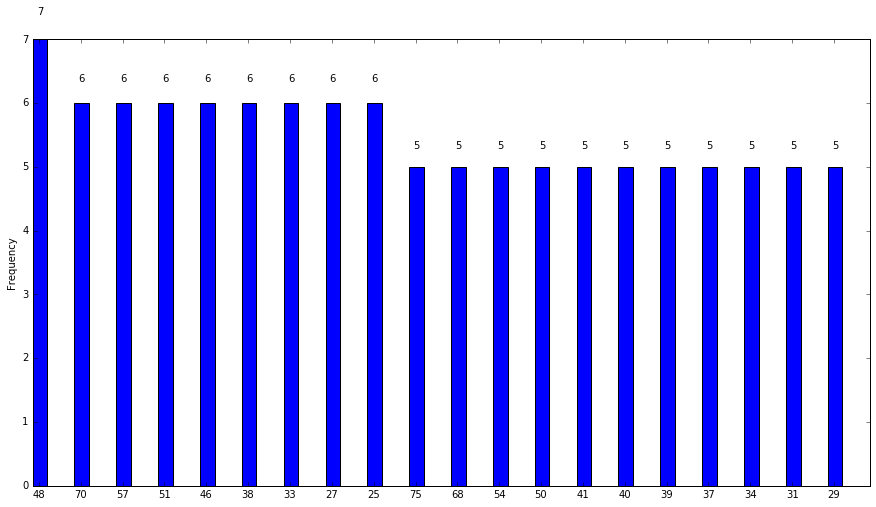

In [53]:
top = 20
x_num = x_num[0:top]
y_freq = y_freq[0:top]
ind = np.arange(len(y_freq)) 
width = 0.35

fig1, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(ind, y_freq, width, color='b')

ax.set_ylabel('Frequency')
ax.set_xticks(ind + 0.15)
ax.set_xticklabels(x_num)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)

plt.show()



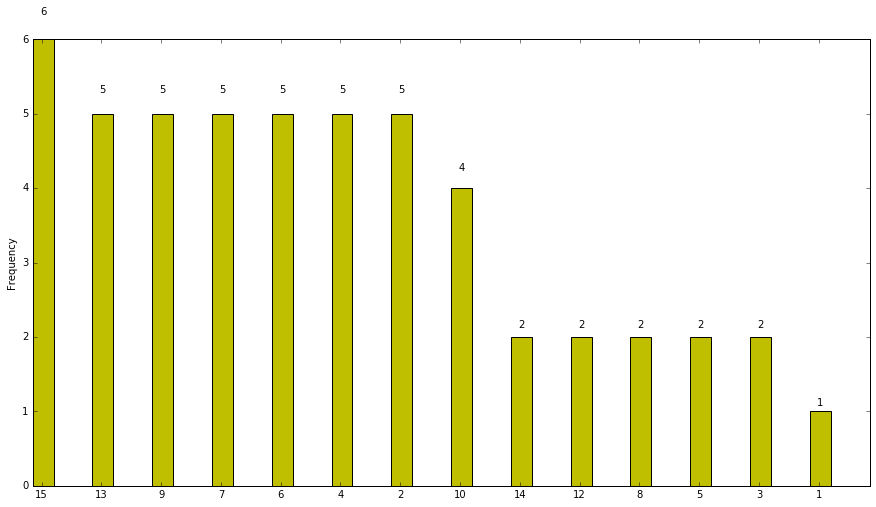

In [58]:
ind = np.arange(len(y_freq_mega)) 
width = 0.35

fig1, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(ind, y_freq_mega, width, color='y')

ax.set_ylabel('Frequency')
ax.set_xticks(ind + 0.15)
ax.set_xticklabels(x_mega)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)

plt.show()

In [48]:
df.loc[0:20]['Winning Num']

0     [37, 52, 36, 38, 62]
1     [34, 66, 67, 68, 61]
2     [72, 65, 51, 25, 48]
3     [32, 71, 54, 66, 65]
4      [9, 41, 49, 31, 34]
5     [41, 50, 70, 18, 68]
6     [70, 50, 11, 51, 75]
7     [26, 24, 19, 68, 40]
8     [48, 27, 75, 17, 24]
9     [66, 20, 54, 38, 21]
10    [56, 74, 22, 46, 12]
11    [32, 26, 14, 27, 36]
12    [28, 36, 45, 33, 29]
13      [5, 37, 74, 6, 55]
14    [16, 14, 48, 17, 28]
15     [19, 42, 60, 21, 2]
16     [28, 9, 40, 57, 65]
17     [37, 10, 34, 73, 9]
18     [59, 7, 62, 63, 11]
19    [38, 52, 71, 65, 31]
20    [57, 53, 13, 45, 52]
Name: Winning Num, dtype: object